<a href="https://colab.research.google.com/github/alexandrecassimiro/VD/blob/main/Gerando_a_nuvem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

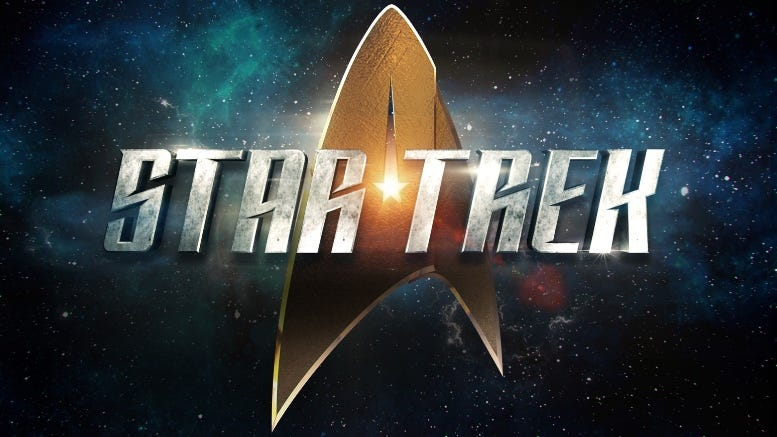
# Neste código: 


1. Acessa arquivo local gerando dataframe
2. Explora dataframe
3. Interação com dados para filtrar arquivo
4. Gera nuvem

In [ ]:
#@title Ver conteúdo de um arquivo zipado.  { display-mode: "form" }
# # ver conteúdo do zip. No caso aqui não precisa pois só tem um.
# import zipfile
# with zipfile.ZipFile('all_series_lines.zip') as z:
#   print(*z.namelist(),sep="\n")

In [ ]:
#@title Abrindo direto de um zipado
# ver conteúdo do zip. No caso aqui não precisa pois só tem um.
import zipfile
import json
import pandas as pd
with zipfile.ZipFile('all_series_lines.zip') as z:
  with z.open('all_series_lines.json') as f:
    all_series_lines = json.load(f)



# Transformar o dicionário em um DataFrame
df = pd.DataFrame([(series_name, episode_number, character, line) for series_name, episodes in all_series_lines.items()
                   for episode_number, lines in episodes.items()
                   for character, lines_list in lines.items()
                   for line in lines_list],
                  columns=['series_name', 'episode_number', 'character', 'line'])
df.series_name.unique()

array(['ENT', 'DS9', 'TOS', 'TAS', 'TNG', 'VOY'], dtype=object)

In [ ]:
#@title Abrindo local
import pandas as pd
import json

# Ler o arquivo JSON
with open('all_series_lines.json') as f:
    all_series_lines = json.load(f)


# Transformar o dicionário em um DataFrame
df = pd.DataFrame([(series_name, episode_number, character, line) for series_name, episodes in all_series_lines.items()
                   for episode_number, lines in episodes.items()
                   for character, lines_list in lines.items()
                   for line in lines_list],
                  columns=['series_name', 'episode_number', 'character', 'line'])





In [ ]:
#@title Verificar o DataFrame
# print(df.head())
# df.head()
df

,series_name,episode_number,character,line
0,ENT,episode 0,KLAANG,
1,ENT,episode 0,KLAANG,
2,ENT,episode 0,KLAANG,Pung ghap! Pung ghap!
3,ENT,episode 0,KLAANG,DujDaj Hegh!
4,ENT,episode 0,KLAANG,Tujpa'qyl Dun.
...,...,...,...,...
266649,VOY,episode 159,SABRINA,Ah ha.
266650,VOY,episode 159,SABRINA,I don't remember you.
266651,VOY,episode 159,SABRINA,Why?
266652,VOY,episode 159,SABRINA,For four years?


In [ ]:
#temos 6 séries
df['series_name'].unique()

array(['ENT', 'DS9', 'TOS', 'TAS', 'TNG', 'VOY'], dtype=object)

In [ ]:
#@title Quantidade de personagens de todas as séries
df['character'].nunique()

2716

In [ ]:
# Agrupar por series_name e episode_number e obter os valores exclusivos de character
df.groupby(['series_name', 'episode_number'])['character'].unique()

series_name  episode_number
DS9          episode 0         [JENNIFER, OPS, JASAD, PICARD, MAGGIE, DUKAT, ...
             episode 1         [KIRA, SISKO, ODO, O'BRIEN, BASHIR, DAX, GARAK...
             episode 10        [KIRA, SISKO, ODO, O'BRIEN, QUARK, BASHIR, DAX...
             episode 100       [SISKO, CREWMAN, ODO, O'BRIEN, QUARK, BASHIR, ...
             episode 101       [KIRA, SISKO, ODO, O'BRIEN, BASHIR, DAX, SECUR...
                                                     ...                        
VOY          episode 95        [JANEWAY, NEELIX, TORRES, KIM, COMPUTER, CHAKO...
             episode 96        [JANEWAY, NEELIX, TORRES, KIM, COMPUTER, CHAKO...
             episode 97        [JANEWAY, NEELIX, TORRES, KIM, COMPUTER, CHAKO...
             episode 98        [JANEWAY, NEELIX, TORRES, KIM, COMPUTER, CHAKO...
             episode 99        [JANEWAY, NEELIX, TORRES, KIM, COMPUTER, CHAKO...
Name: character, Length: 708, dtype: object

In [ ]:
# filtrar por uma série
oneserie =df.loc[df['series_name']=='DS9']
oneserie

,series_name,episode_number,character,line
35097,DS9,episode 0,JENNIFER,Hey!
35098,DS9,episode 0,JENNIFER,Yes?
35099,DS9,episode 0,JENNIFER,I'm sorry did we meet last night at George's p...
35100,DS9,episode 0,JENNIFER,Are you okay?
35101,DS9,episode 0,JENNIFER,We met here before?
...,...,...,...,...
102188,DS9,episode 172,EKOOR,The cargo door.
102189,DS9,episode 172,EKOOR,For Cardassia!
102190,DS9,episode 172,EKOOR,The Federation fleet has surrounded the planet.
102191,DS9,episode 172,CARDASSIANS,For Cardassia!


In [ ]:
#contagem de personagens de uma série
qtpersonagens = oneserie['character'].nunique()
qtpersonagens

698

In [ ]:
# personagens
personagens = oneserie['character']
personagens

In [ ]:
#conseguir os episódioS de uma série
epsserie = df.loc[df['series_name'] == 'DS9']
print(epsserie['episode_number'].nunique())
#print(epsserie['episode_number'].unique())



173


In [ ]:
#personagens de um episódio
personagens = oneserie['character'].unique()
personagens

In [ ]:
#@title personagens de um episódio de uma série
voyEp0C = df.loc[(df['series_name'] == 'DS9') & (df['episode_number'] == 'episode 0')]
print(voyEp0C['character'].unique())
print(voyEp0C['character'].nunique())

['JENNIFER' 'OPS' 'JASAD' 'PICARD' 'MAGGIE' 'DUKAT' 'BUREAUCRAT' 'CONN'
 'KIRA' 'PIT' 'SISKO' 'ALIEN' 'CREWWOMAN' 'GIRL' 'CREWMAN' 'ODO' "O'BRIEN"
 'ODN' 'NOG' 'OPAKA' 'CAPTAIN' 'ENSIGN' 'LOCUTUS' 'QUARK' 'BASHIR' 'DAX'
 'COMPUTER' 'BOSS' 'OFFICER' 'JAKE' 'TACTICAL' 'CARDASSIAN' 'LIEUTENANT'
 'MONK' 'BATSMAN']
35


In [ ]:
#@title filtros precarregados  { display-mode: "form" }
#@markdown ## Campo de seleção


Série = "Deep Space Nine" #@param ["Deep Space Nine", "Enterprise", "The Animated Serie", "The New Generation", "The Original Serie", "Voyager"]
epi = "episode 0" #@param ["episode 0", "episode 1", "episode 2", ""] {allow-input: true}
pers = "SISKO" #@param ["JANEWAY", "MARK", "TORRES", "QUARK", "SISKO"]
#@markdown ## Interação com o gráfico
#@markdown ### Quantidade de palavras
MAX = 1000 #@param ["10", "100", "1000"] {type:"raw"}
#@markdown ### Cor de fundo
CORF = 'WHITE' #@param ["BLACK", "WHITE", "GREEN"] {type:"raw"}
#@markdown ### Cor das palavras
CORP = 'WHITE' #@param ["BLACK", "WHITE", "GREEN"] {type:"raw"}

match Série:
    case 'Enterprise':
        seriado = "ENT"
    case 'Deep Space Nine':
        seriado = "DS9"
    case 'The Original Serie':
        seriado = "TOS"
    case 'The Animated Serie':
        seriado = "TAS"
    case 'The New Generation':
        seriado = "TNG"
    case 'Voyager':
        seriado = "VOY"
    # case '_':
    #     print("Entre com a série")
# 'ENT', 'DS9', 'TOS', 'TAS', 'TNG', 'VOY

print(Série)
print(seriado)
print(epi)
print(pers)
print(MAX)
print(CORF)
print(CORP)

Deep Space Nine
DS9
episode 0
SISKO
1000
WHITE
WHITE


In [ ]:
# Acessando as linhas conforme filtro recebido
# lines = all_series_lines['DS9']['episode 0']['SISKO']
lines = all_series_lines[seriado][epi][pers]
#print(lines)


In [ ]:
# Convertendo as linhas em um dicionário
lines_dict = {}
for i, line in enumerate(lines):
    lines_dict[str(i+1)] = line


In [ ]:
# Convertendo o dicionário em um dataframe
df = pd.DataFrame.from_dict(lines_dict, orient='index', columns=['line'])

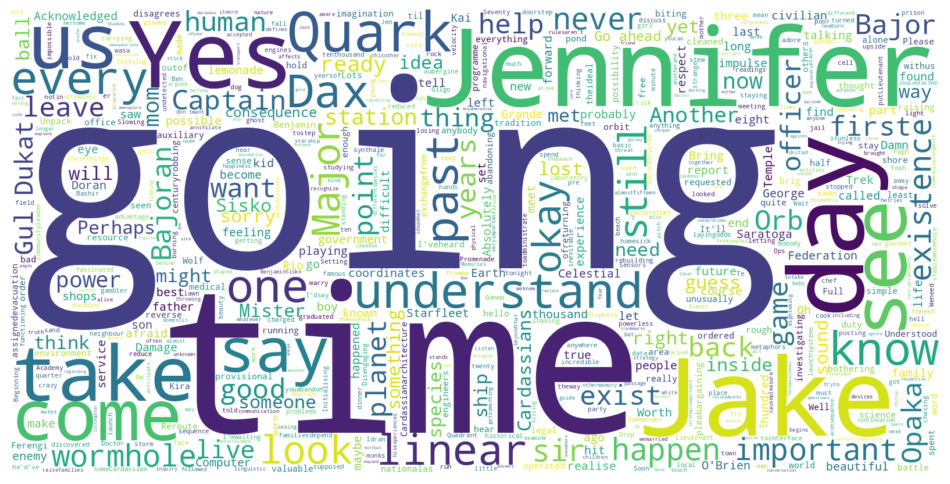

In [ ]:
#@title THE CLOUD!
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Gerando a nuvem de palavras

# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['line']))
# wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=10).generate(' '.join(df['line']))
# wordcloud = WordCloud(contour_width=1000, width=800, height=400, background_color='white', max_words=MAX).generate(' '.join(df['line']))
#wordcloud = WordCloud(contour_width=1000, width=800, height=400, background_color='white', max_words=MAX).generate(' '.join(df['line']))
# wordcloud = WordCloud(color_func='green', contour_width=1000, width=800, height=400, background_color='white', max_words=MAX).generate(' '.join(df['line']))
# wordcloud = WordCloud(contour_width=1000, width=800, height=400, background_color='white').generate(' '.join(df['line']))
wordcloud = WordCloud(contour_width=2000, width=1600, height=800, background_color=CORP, max_words=MAX).generate(' '.join(df['line']))

# (class) WordCloud
#  (font_path: Any | None = None,
#   width: int = 400, 
#   height: int = 200,
#   margin: int = 2,
#   ranks_only: Any | None = None,
#   prefer_horizontal: float = 0.9,
#   mask: Any | None = None,
#   scale: int = 1,
#   color_func: Any | None = None,
#   max_words: int = 200, min_font_size: int = 4, stopwords: Any | None = None, random_state: Any | None = None,
#   background_color: str = 'black', max_font_size: Any | None = None, font_step: int = 1, mode: str = "RGB", relative_scaling: str = 'auto', regexp: Any | None = None,
#   collocations: bool = True, colormap: Any | None = None, normalize_plurals: bool = True, contour_width: int = 0, contour_color: str = 'black', 
#   repeat: bool = False, include_numbers: bool = False, min_word_length: int = 0, collocation_threshold: int = 30)


# Exibindo a nuvem
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


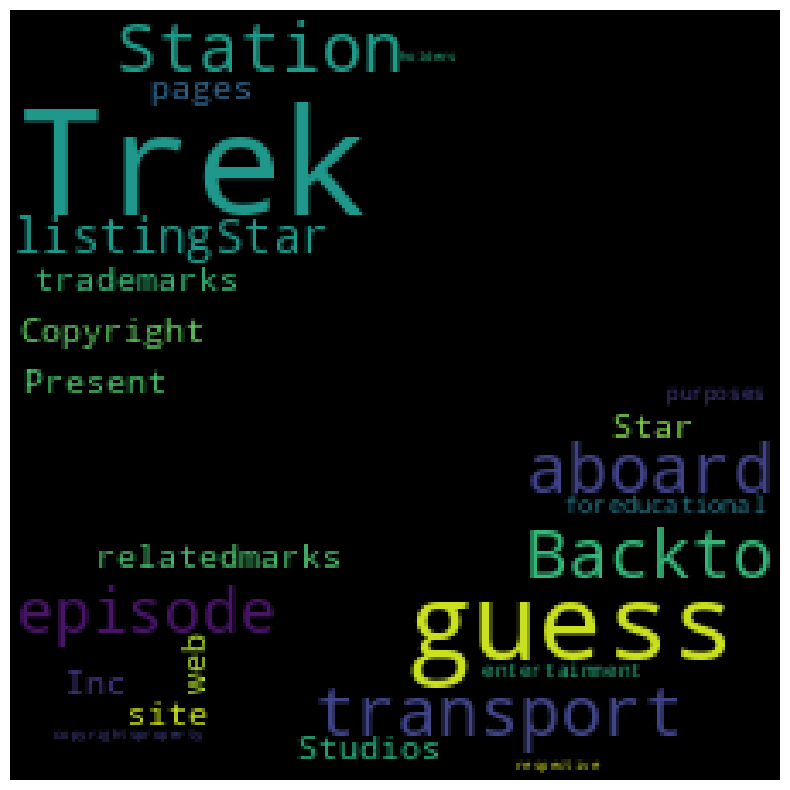

In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
# text = open(path.join(d, 'alice.txt')).read()


# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
# alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))
# alice_mask = np.array(Image.open(path.join(d, "/content/iconINV.png"))) #com essa dá um pouco certo
alice_mask = np.array(Image.open(path.join(d, "/content/ncc1701inc.jpg"))) #com essa dá um pouco certo

stopwords = set(STOPWORDS)
stopwords.add("said")

# wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
#                stopwords=stopwords, contour_width=3, contour_color='steelblue')

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=alice_mask, max_font_size=200,
                      min_font_size=1).generate(line)
# wordcloud = WordCloud(contour_width=2000, width=1600, height=800, background_color="black", max_words=MAX,mask=alice_mask).generate(' '.join(df['line']))
# generate word cloud
# wc.generate(line)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)
# wordcloud.to_file("airbnb_summary_wordcloud.png")


# # store to file
# wc.to_file(path.join(d, "/content/bottom2.png"))


# # show
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
# plt.figure()
# plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.axis("off")
# plt.show()